# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score? Ethereum
2. Which coin had the highest negative score? Bitcoin
3. Which coin had the highest positive score? Ethereum

In [1]:
%%capture
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
load_dotenv()
# Read your api key environment variable
my_key = os.getenv("NEWS_API")

In [3]:
from newsapi import NewsApiClient
# Create a newsapi client
newsapi = NewsApiClient(api_key=my_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q="Bitcoin", language="en")
# Print total articles
print(f"Total articles about Bitcoin: {bitcoin['totalResults']}")

Total articles about Bitcoin: 5047


In [5]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(q="Ethereum", language="en")
# Print total articles
print(f"Total articles about Ethereum: {ethereum['totalResults']}")

Total articles about Ethereum: 1296


In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text,
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
df_bitcoin = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative","neutral","positive", "text" ]
df_bitcoin = df_bitcoin[cols]

df_bitcoin.head()

,compound,negative,neutral,positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."


In [7]:
# bitcoin_sentiments

In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for articles in ethereum["articles"]:
    try:
        text = articles["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text,
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
df_ethereum = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative","neutral","positive", "text" ]
df_ethereum = df_ethereum[cols]
,
df_ethereum.head()

,compound,negative,neutral,positive,text
0,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.000,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...


In [9]:
# Describe the Bitcoin Sentiment
df_bitcoin.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.255311,0.017579,0.902526,0.079842
std,0.352664,0.035419,0.084095,0.075083
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.833500,0.000000
50%,0.202300,0.000000,0.897000,0.072000
75%,0.538650,0.000000,1.000000,0.150000
max,0.801600,0.103000,1.000000,0.209000


In [10]:
# Describe the Ethereum Sentiment
df_ethereum.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.094520,0.009200,0.953050,0.037750
std,0.262268,0.028408,0.079579,0.075276
min,-0.493900,0.000000,0.682000,0.000000
25%,0.000000,0.000000,0.931500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.177900,0.000000,1.000000,0.054500
max,0.877900,0.099000,1.000000,0.318000


### Questions:
Q: Which coin had the highest mean positive score? A: Ethereum
        
Q: Which coin had the highest compound score?  A: Ethereum
        
Q. Which coin had the highest positive score? A: Ethereum

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

import nltk
nltk.download('stopwords')

True

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Expand the default stopwords list if necessary


In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
#     list_words = []
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub(' ', str(text))
    words = word_tokenize(re_clean)
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [14]:
# Create a new tokens column for bitcoin
df_bitcoin["tokens"] = df_bitcoin.text.apply(tokenizer)
df_bitcoin.head(5)

,compound,negative,neutral,positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visa, ha, partnered, cryptocurrency, startup,..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, time, high, november, th,..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, bitco..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[everything, dumb, work, come, close, cryptocu..."
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, two, month, ra..."


In [15]:
# Create a new tokens column for ethereum
df_ethereum["tokens"] = df_ethereum.text.apply(tokenizer)
df_ethereum.head()

,compound,negative,neutral,positive,text,tokens
0,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
1,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.4215,0.000,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, ethereum,..."
3,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...,"[bitcoin, wa, derided, serious, investor, bubb..."
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[file, photo, representation, virtual, currenc..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
processed_bitcoin = tokenizer(df_bitcoin['tokens'])
bigrams_count = Counter(ngrams(processed_bitcoin, n=2))
bigrams_bitcoin = (dict(bigrams_count))
bigrams_bitcoin

{('visa', 'ha'): 1,
 ('ha', 'partnered'): 1,
 ('partnered', 'cryptocurrency'): 1,
 ('cryptocurrency', 'startup'): 1,
 ('startup', 'reaching'): 1,
 ('reaching', 'previous'): 1,
 ('previous', 'time'): 1,
 ('time', 'high'): 1,
 ('high', 'november'): 1,
 ('november', 'th'): 1,
 ('th', 'almost'): 1,
 ('almost', 'three'): 1,
 ('three', 'year'): 1,
 ('year', 'day'): 1,
 ('day', 'since'): 1,
 ('since', 'price'): 1,
 ('price', 'bitco'): 1,
 ('bitco', 'everything'): 1,
 ('everything', 'dumb'): 1,
 ('dumb', 'work'): 1,
 ('work', 'come'): 1,
 ('come', 'close'): 1,
 ('close', 'cryptocu'): 1,
 ('cryptocu', 'november'): 1,
 ('november', 'absolutely'): 1,
 ('absolutely', 'massive'): 1,
 ('massive', 'two'): 1,
 ('two', 'month'): 1,
 ('month', 'ra'): 1,
 ('ra', 'unlike'): 1,
 ('unlike', 'conventional'): 1,
 ('conventional', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'centr'): 1,
 ('centr', 'youve'): 1,
 ('youve', 'watching'): 1,
 ('watching', 'crypto'): 1,
 ('crypto', 'market'): 1,
 ('market', 'past'

In [18]:
# Generate the Ethereum N-grams where N=2
processed_ethereum = tokenizer(df_ethereum['tokens'])
bigrams_count = Counter(ngrams(processed_ethereum, n=2))
bigrams_ethereum = dict(bigrams_count)
bigrams_ethereum

{('file', 'photo'): 9,
 ('photo', 'representation'): 9,
 ('representation', 'ethereum'): 2,
 ('ethereum', 'virtua'): 2,
 ('virtua', 'file'): 1,
 ('virtua', 'london'): 1,
 ('london', 'reuters'): 1,
 ('reuters', 'digital'): 1,
 ('digital', 'currency'): 1,
 ('currency', 'ethereum'): 1,
 ('ethereum', 'bitcoin'): 1,
 ('bitcoin', 'wa'): 1,
 ('wa', 'derided'): 1,
 ('derided', 'serious'): 1,
 ('serious', 'investor'): 1,
 ('investor', 'bubb'): 1,
 ('bubb', 'file'): 1,
 ('representation', 'virtual'): 5,
 ('virtual', 'currenc'): 1,
 ('currenc', 'file'): 1,
 ('virtual', 'curren'): 2,
 ('curren', 'file'): 1,
 ('curren', 'new'): 1,
 ('new', 'york'): 3,
 ('york', 'reuters'): 2,
 ('reuters', 'institutional'): 2,
 ('institutional', 'investor'): 2,
 ('investor', 'new'): 1,
 ('investor', 'paypal'): 1,
 ('paypal', 'ha'): 1,
 ('ha', 'launched'): 1,
 ('launched', 'generosity'): 1,
 ('generosity', 'network'): 1,
 ('network', 'pl'): 1,
 ('pl', 'reuters'): 1,
 ('reuters', 'staff'): 6,
 ('staff', 'file'): 4,
 (

In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
bitcoin = tokenizer(df_bitcoin.text.str.cat())
# Get the top 10 words for Bitcoin
bitcoin_ten = str(token_count(bitcoin, 10))
bitcoin_ten

"[('char', 19), ('bitcoin', 15), ('reuters', 11), ('ha', 8), ('illustration', 8), ('november', 6), ('year', 6), ('cryptocurrency', 5), ('time', 5), ('price', 5)]"

In [21]:
ethereum = tokenizer(df_ethereum.text.str.cat())
# Get the top 10 words for Ethereum
ethereum_ten = str(token_count(ethereum, 10))
ethereum_ten

"[('reuters', 29), ('illustration', 22), ('char', 20), ('bitcoin', 16), ('file', 13), ('photo', 13), ('currency', 13), ('virtual', 12), ('taken', 12), ('dado', 11)]"

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

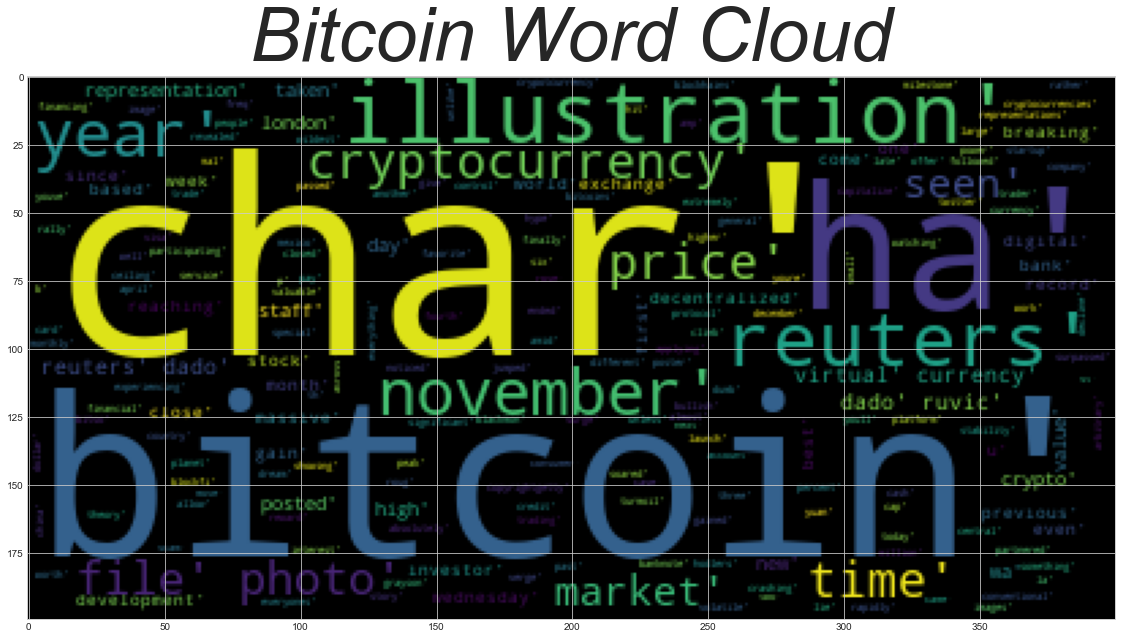

In [23]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(str(bitcoin))
plt.imshow(wc)
plt.title("Bitcoin Word Cloud", fontsize=75, fontstyle='italic')

Text(0.5, 1.0, 'Ethereum Word Cloud')

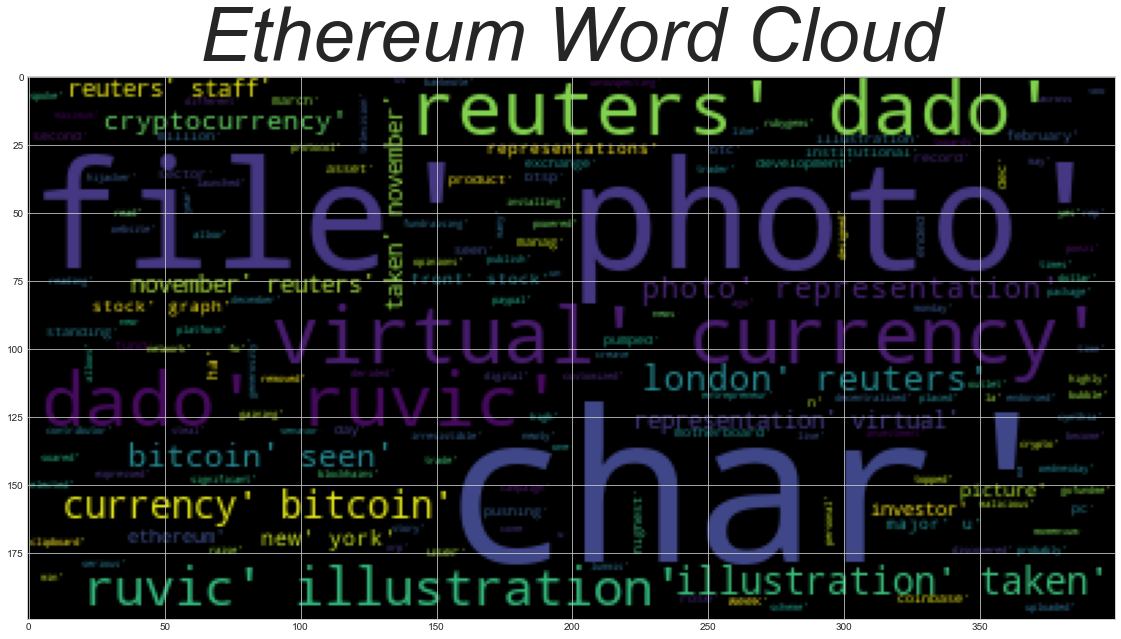

In [24]:
# Generate the Ethereum word cloud
# ethereum = str(df_ethereum["tokens"])
wc = WordCloud().generate(str(ethereum))
plt.imshow(wc)
plt.title("Ethereum Word Cloud", fontsize=75, fontstyle='italic')

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [27]:
# Concatenate all of the bitcoin text together


In [28]:
# Run the NER processor on all of the text


# Add a title to the document


In [29]:
# Render the visualization


In [30]:
# List all Entities


---

## Ethereum NER

In [31]:
# Concatenate all of the bitcoin text together


In [32]:
# Run the NER processor on all of the text


# Add a title to the document


In [33]:
# Render the visualization


In [34]:
# List all Entities
